In [1]:
# libraries
import os
import time
import multiprocessing
import gc
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def plot_heatmap(matrix, title, labels, with_values = False, save = False, directory = None):
    plt.figure(figsize=(20, 14))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.xticks(np.arange(matrix.shape[1]), labels, rotation=90)
    plt.yticks(np.arange(matrix.shape[0]), labels)
    plt.xticks(np.arange(matrix.shape[1]))
    plt.yticks(np.arange(matrix.shape[0]))
    if with_values:
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                plt.text(j, i, f'{matrix[i, j]:.1f}', ha='center', va='center', color='white')
    plt.tight_layout()
    if save:
        os.makedirs(directory, exist_ok=True)
        plt.savefig(os.path.join(directory, title + '.pdf'), bbox_inches='tight')
    else:
        plt.show()
    plt.close()

In [3]:
def normalize_matrix(matrix):
    diag = np.sqrt(np.diag(matrix))
    m = matrix / np.outer(diag, diag)
    return m

In [4]:
K = np.load('spk_matrix/K.npy')

In [6]:
dates1 = ['2019-01-01', '2019-01-02', '2019-01-03', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19', '2019-03-20']
dates2 = ['2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03', '2019-09-14', '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18', '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20']
dates = dates1 + dates2

# Con Dirac

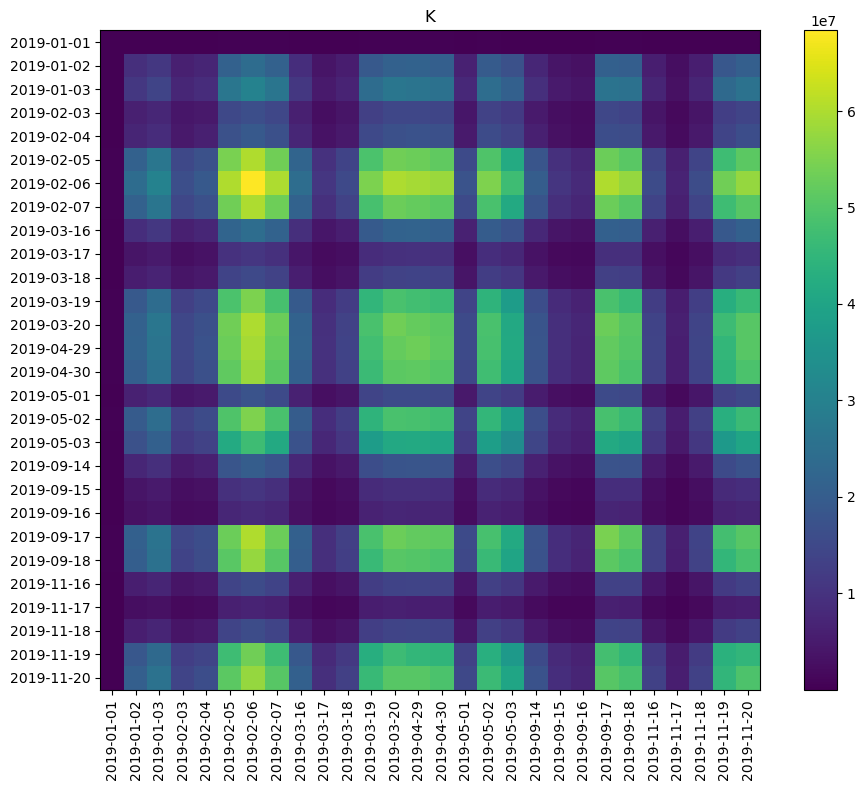

In [21]:
plot_heatmap(K, 'K', dates)

In [21]:
K_norm = normalize_matrix(K)

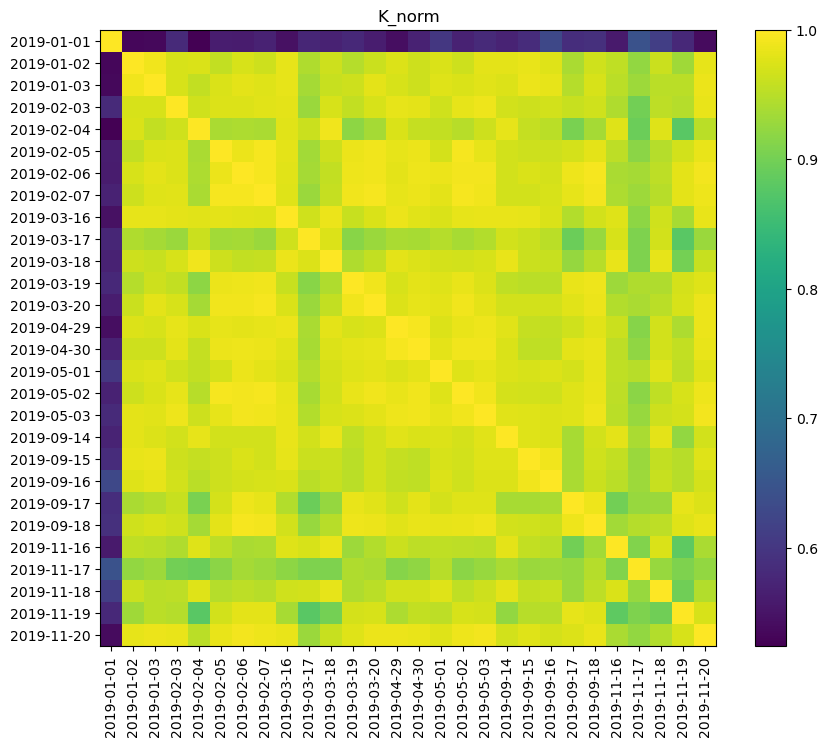

In [22]:
plot_heatmap(K_norm, 'K_norm', dates)

# Con Gauss

In [28]:
K_gauss = np.load('spk_matrix/K_gauss.npy')

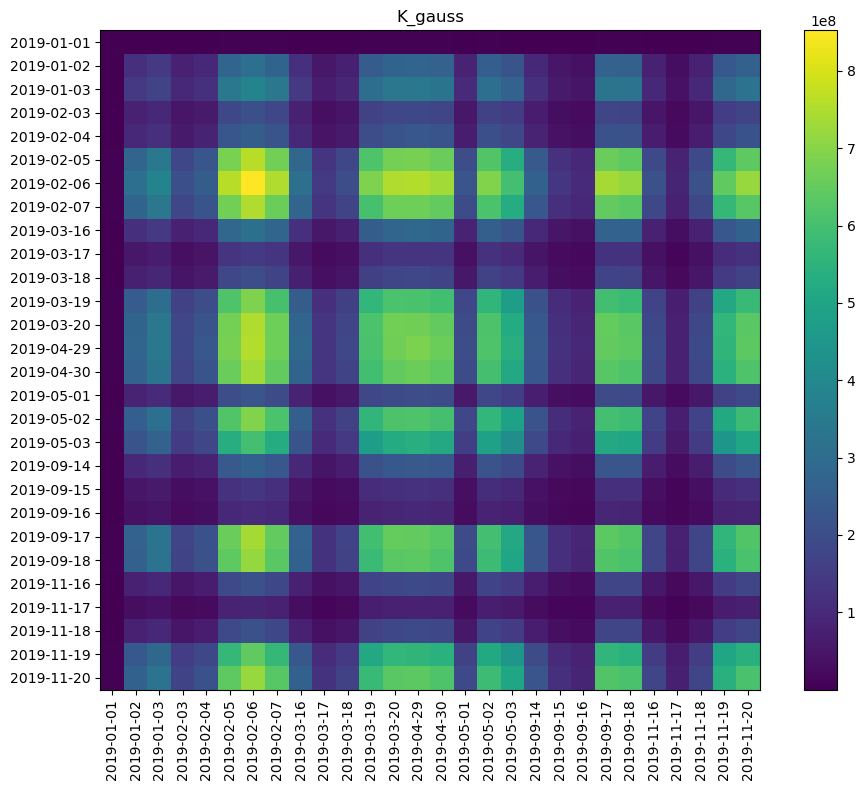

In [29]:
plot_heatmap(K_gauss, 'K_gauss', dates)

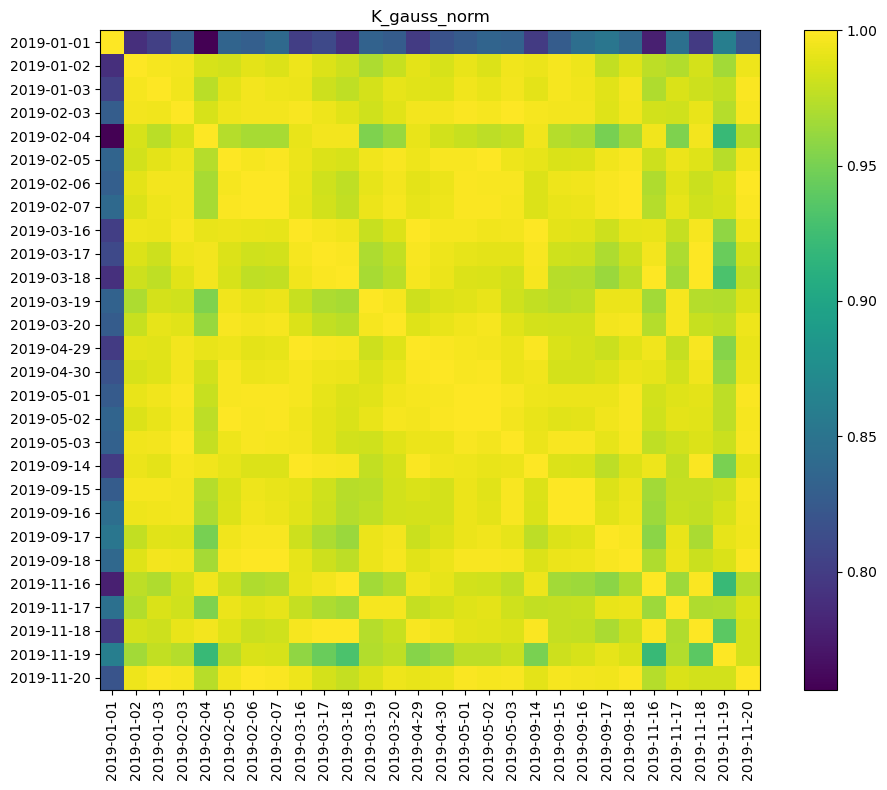

In [30]:
plot_heatmap(normalize_matrix(K_gauss), 'K_gauss_norm', dates)

# Con multicuadrica inversa

In [31]:
K_inverse = np.load('spk_matrix/K_inverse.npy')

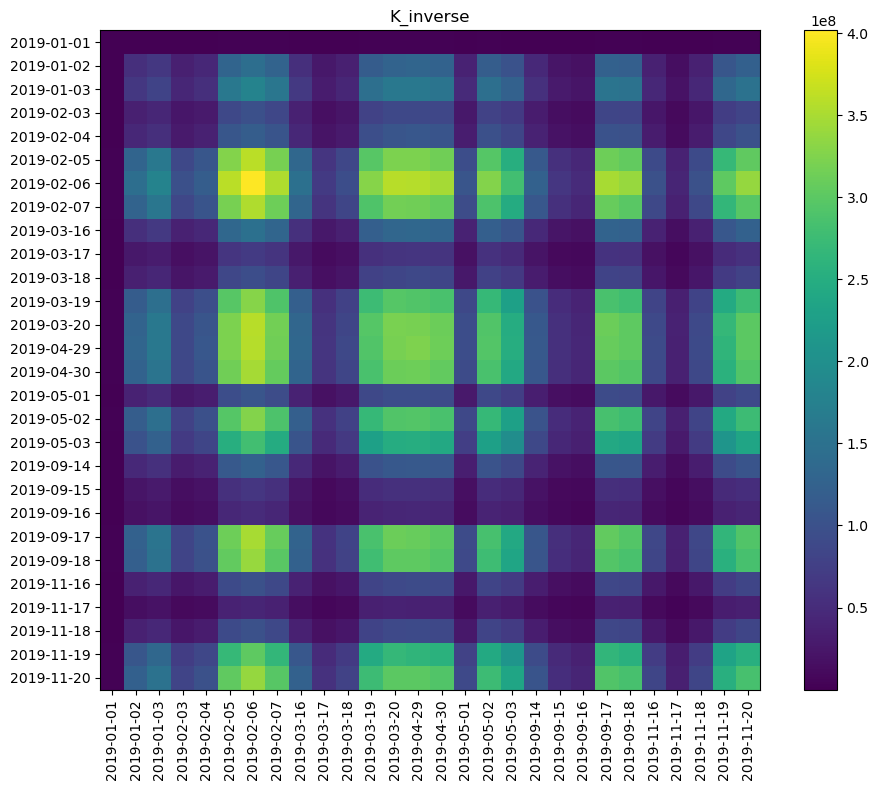

In [32]:
plot_heatmap(K_inverse, 'K_inverse', dates)

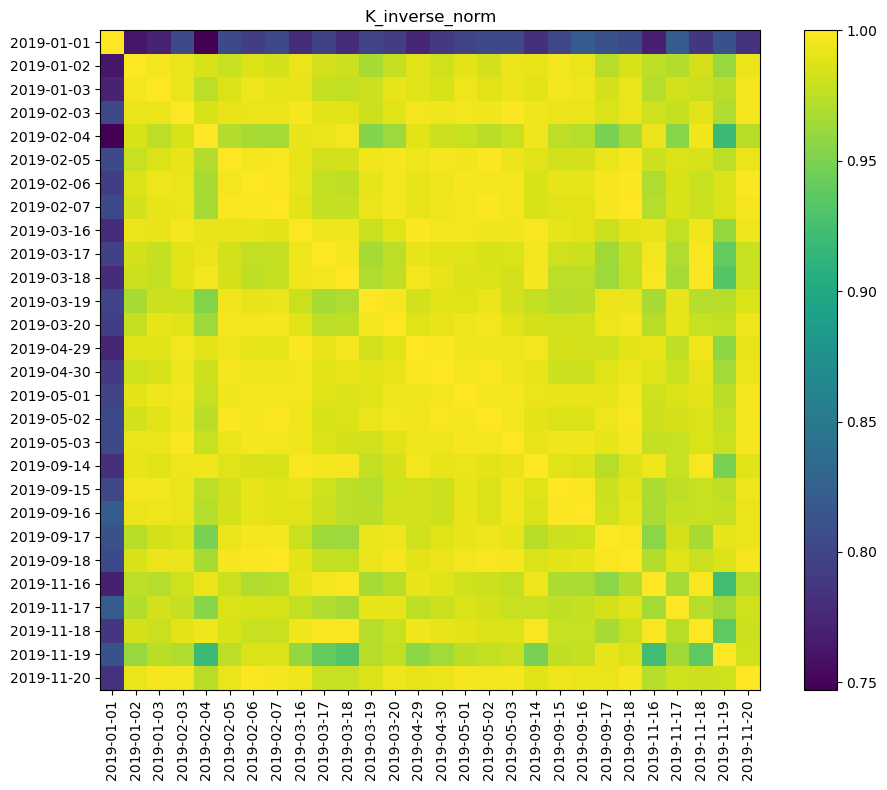

In [33]:
plot_heatmap(normalize_matrix(K_inverse), 'K_inverse_norm', dates)

# Sobre el género

In [10]:
#dir = '/home/user/Desktop/Datos/'
dir = '/Users/antoniomendez/Desktop/Tesis/Datos/datos_limpios/'

In [11]:
data_2019 = pd.read_csv(dir + 'mibici/mibici_2019.csv')

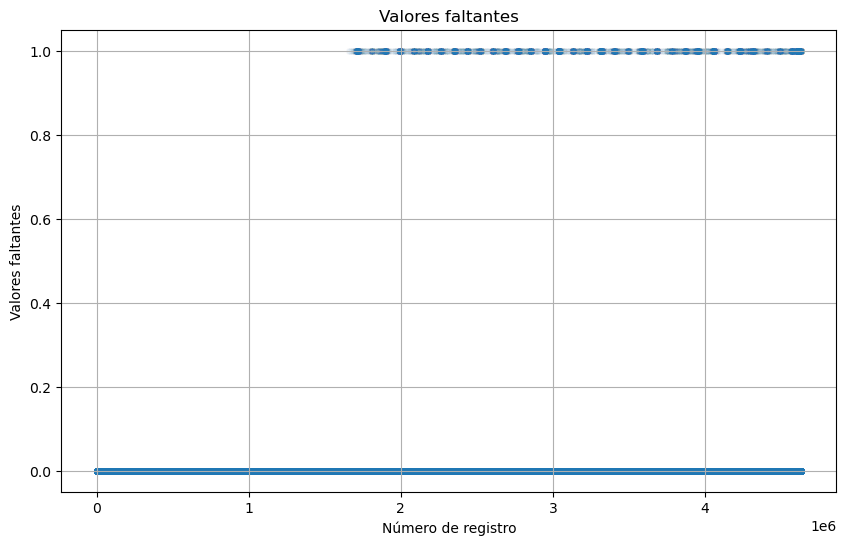

In [43]:
# Contar los valores faltantes en la columna 'Genero'
missing_values = data_2019['Genero'].isna()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data_2019)), missing_values, s=15, alpha=0.01)
plt.xlabel('Número de registro')
plt.ylabel('Valores faltantes')
plt.title('Valores faltantes')
plt.grid()
plt.show()

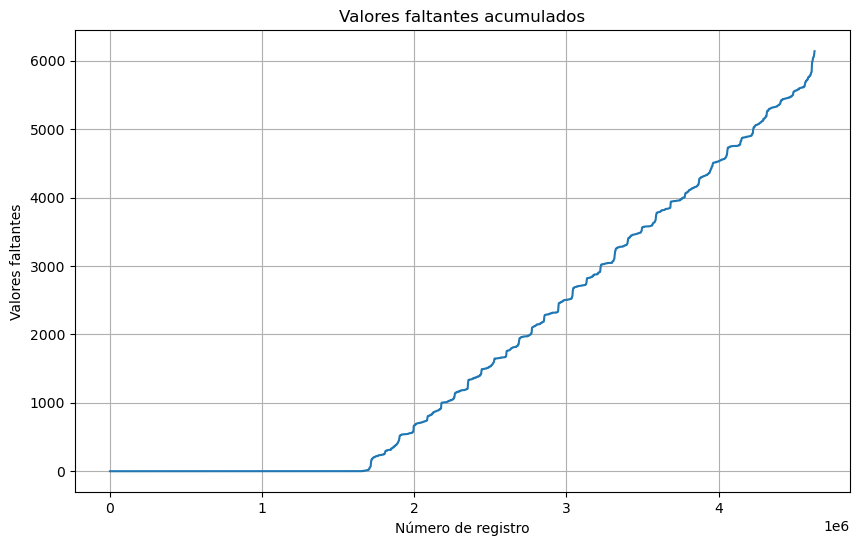

In [44]:
# Contar los valores faltantes en la columna 'Genero'
missing_values = data_2019['Genero'].isna().cumsum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(range(len(data_2019)), missing_values)
plt.xlabel('Número de registro')
plt.ylabel('Valores faltantes')
plt.title('Valores faltantes acumulados')
plt.grid()
plt.show()

## Con un kernel de dirac

In [4]:
K_f_dirac = np.load('spk_matrix/K_F_dirac.npy')

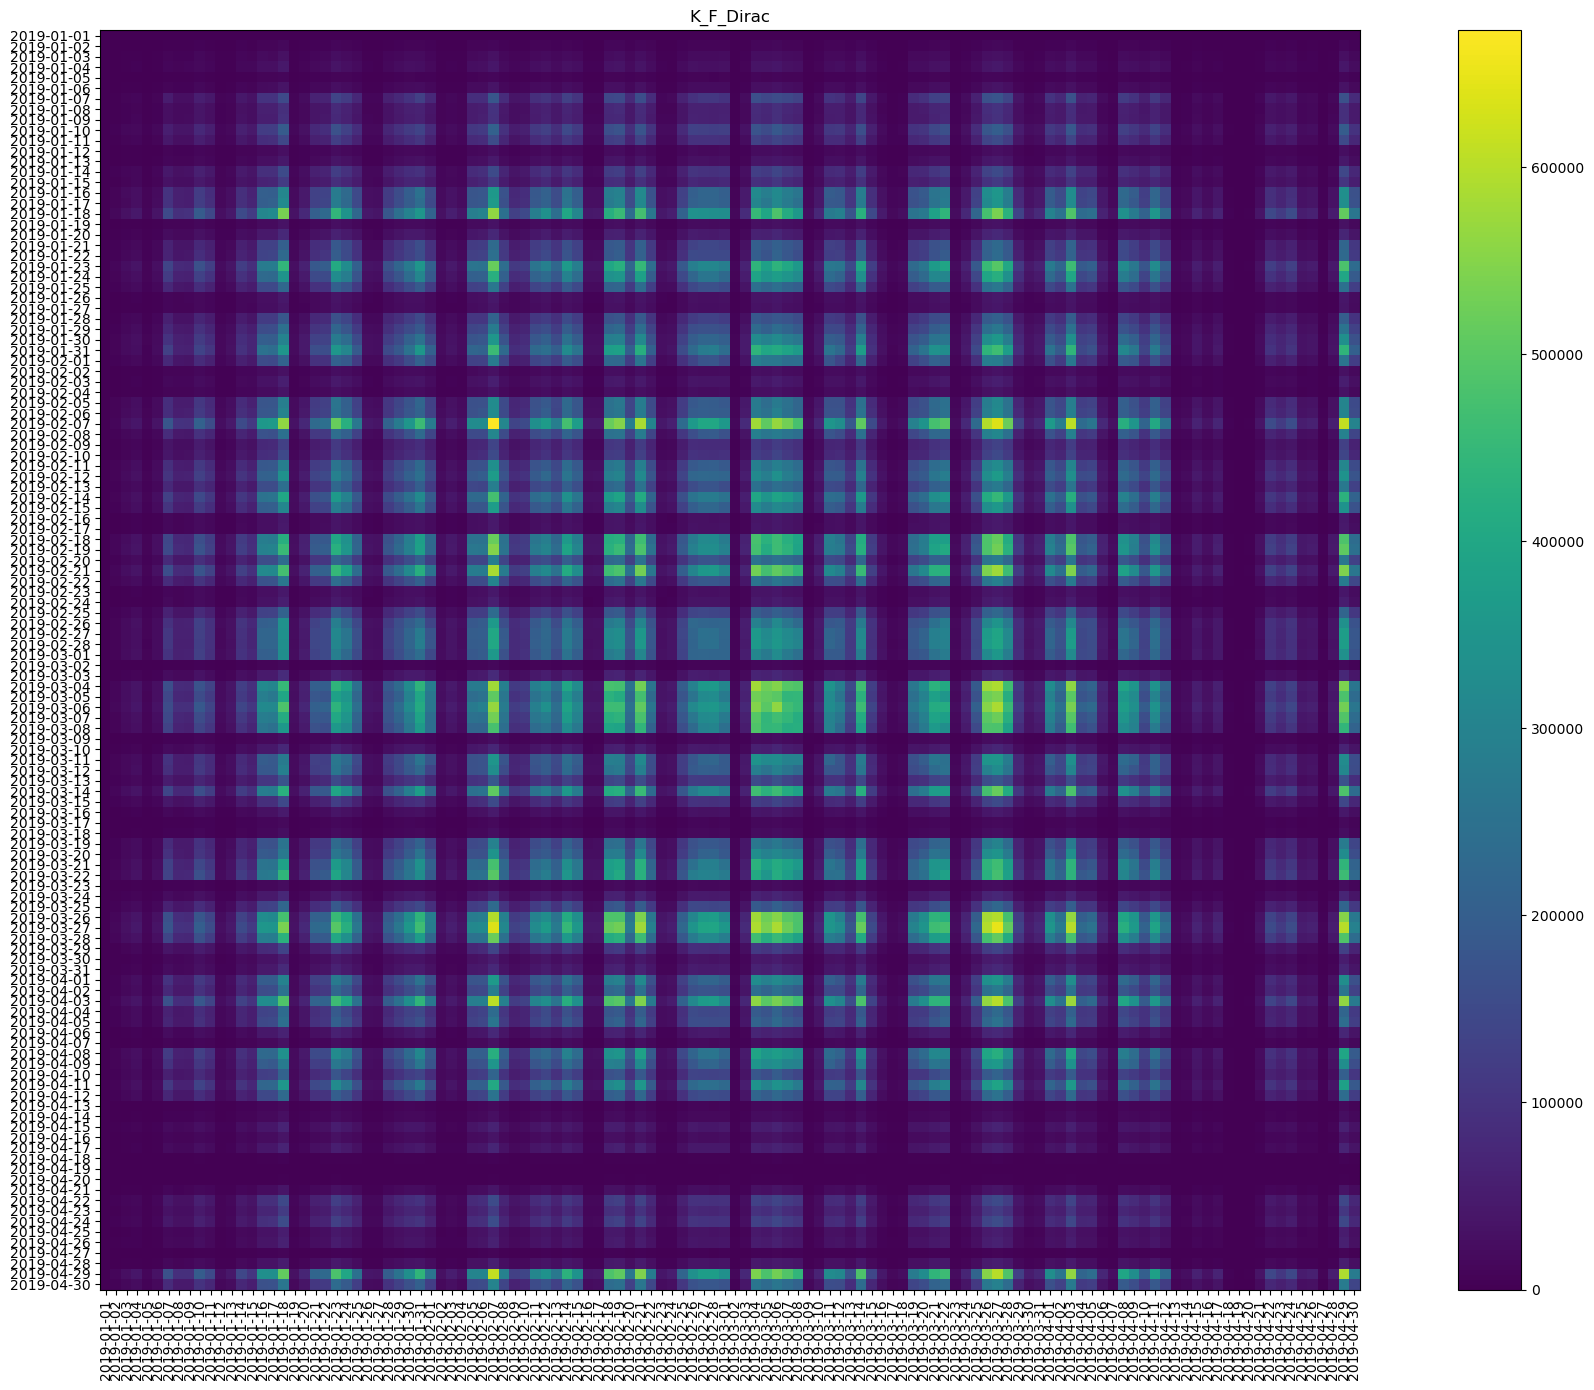

In [ ]:
dates1 = [f'2019-01-{i:02d}' for i in range(1, 32)]
dates2 = [f'2019-02-{i:02d}' for i in range(1, 29)]
dates3 = [f'2019-03-{i:02d}' for i in range(1, 32)]
dates4 = [f'2019-04-{i:02d}' for i in range(1, 31)]
dates = dates1 + dates2 + dates3 + dates4
plot_heatmap(K_f_dirac, 'K_F_Dirac', dates)

/var/folders/vk/zp_d1g0941s_66x6rkq_912w0000gn/T/ipykernel_5411/1964130726.py:3: RuntimeWarning: invalid value encountered in divide
  m = matrix / np.outer(diag, diag)


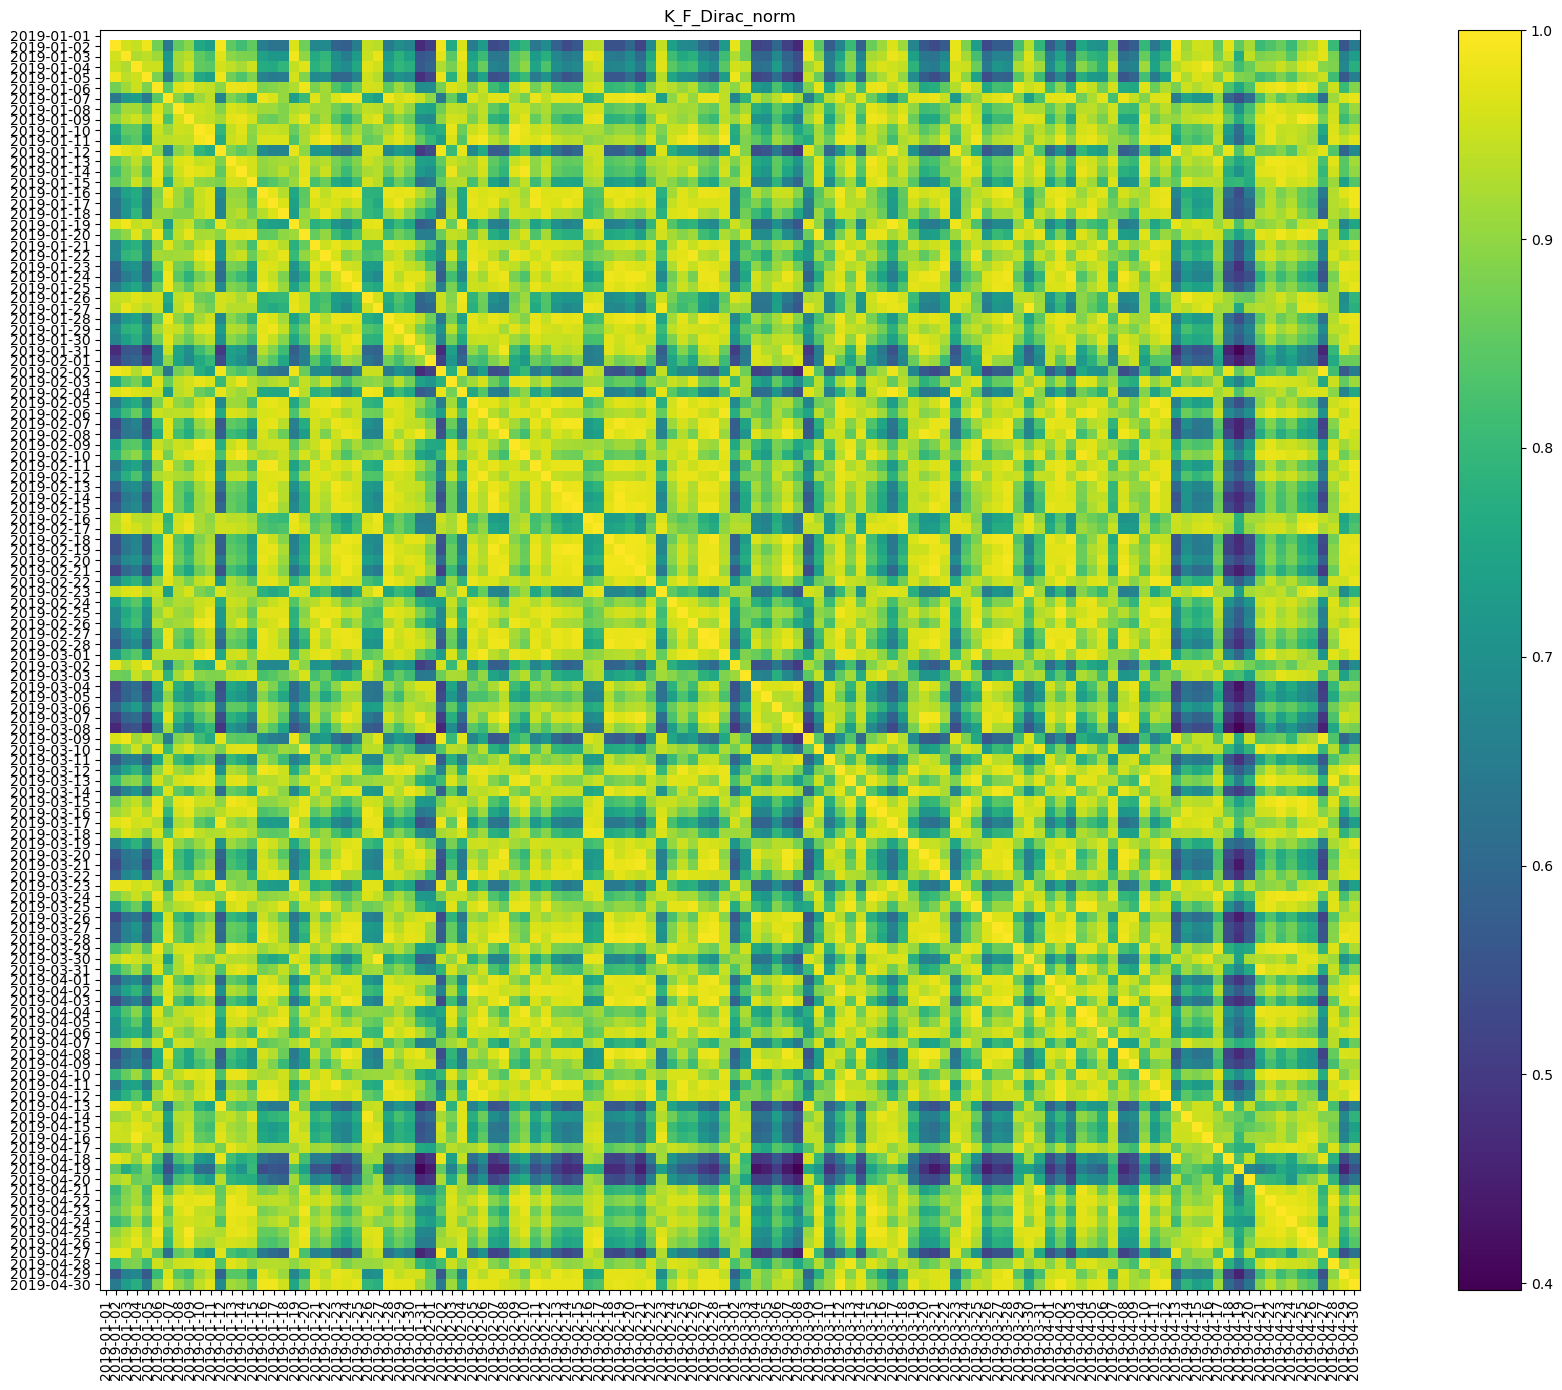

In [ ]:
plot_heatmap(normalize_matrix(K_f_dirac), 'K_F_Dirac_norm', dates)

In [16]:
K_m_dirac = np.load('spk_matrix/K_M_gauss.npy')

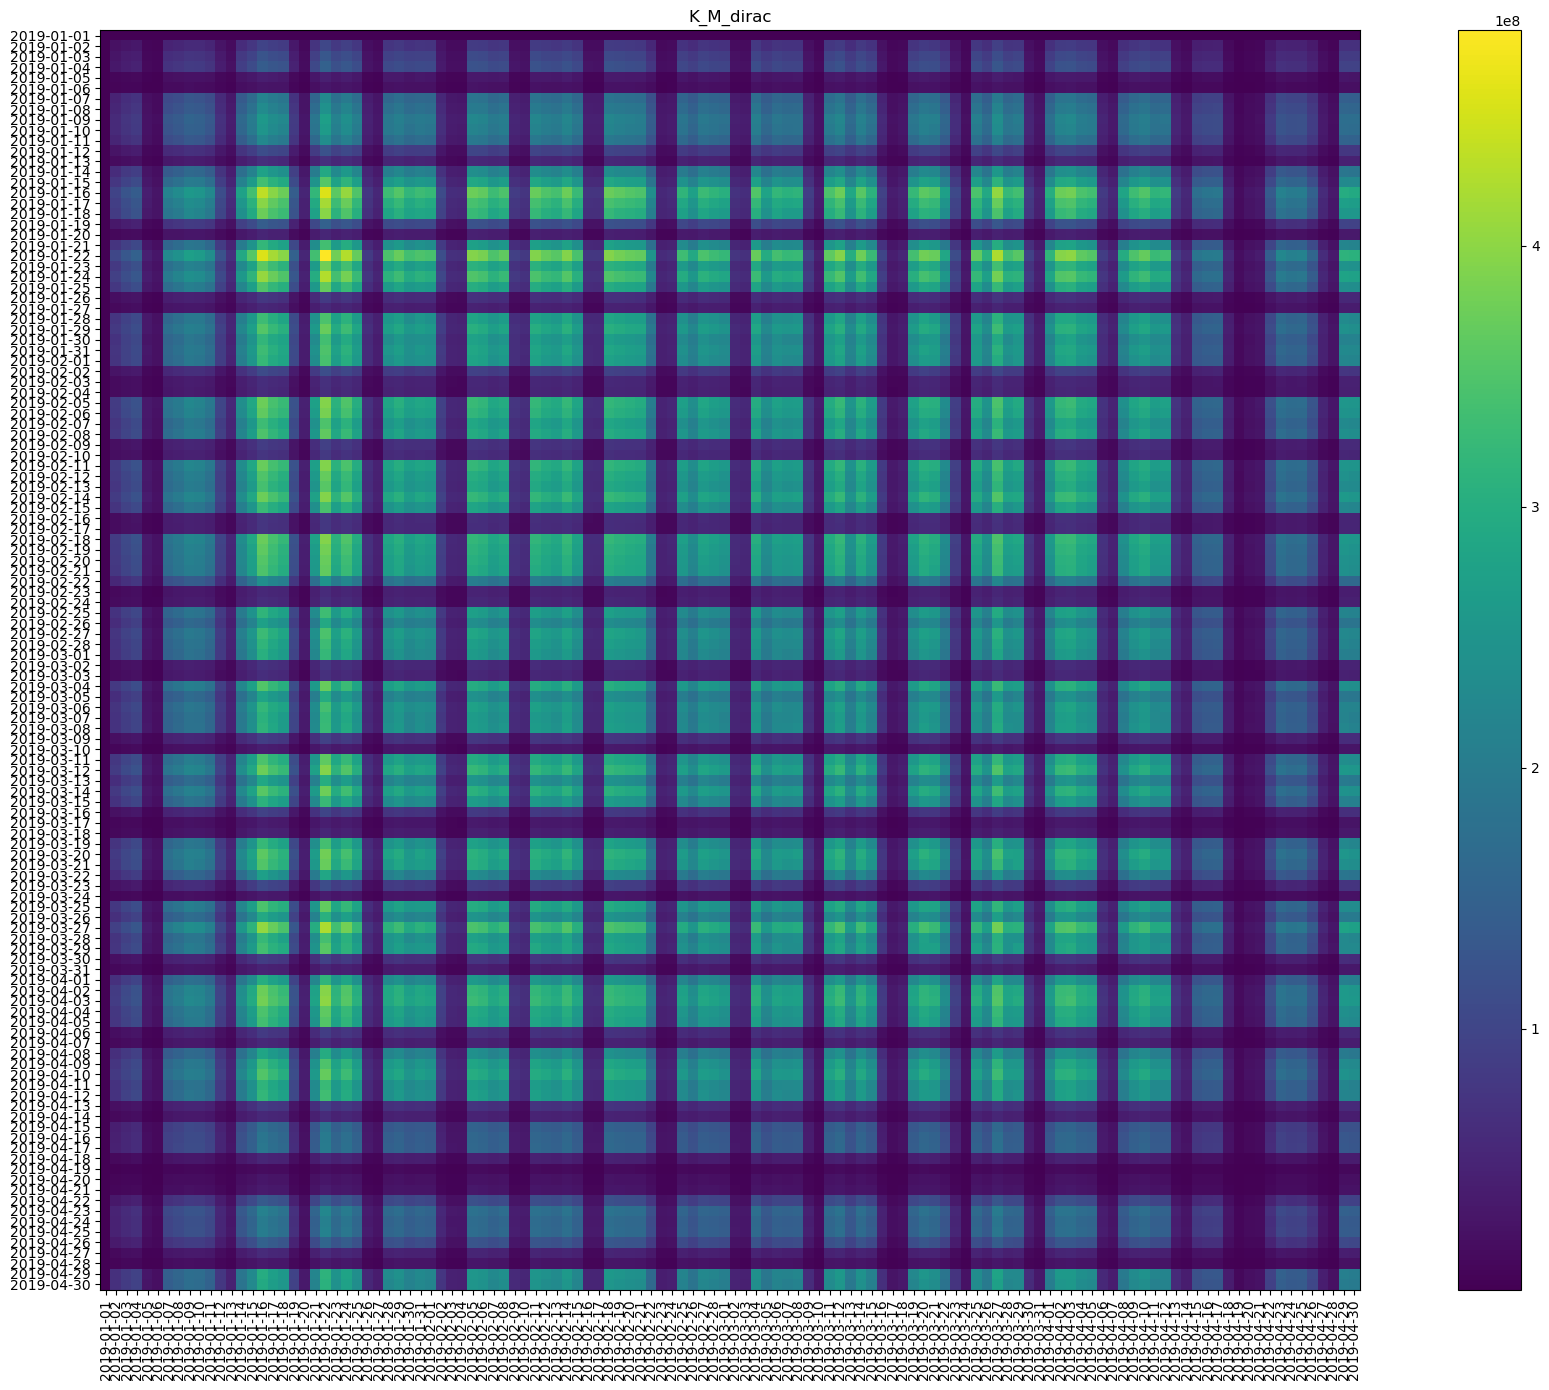

In [17]:
plot_heatmap(K_m_dirac, 'K_M_dirac', dates)

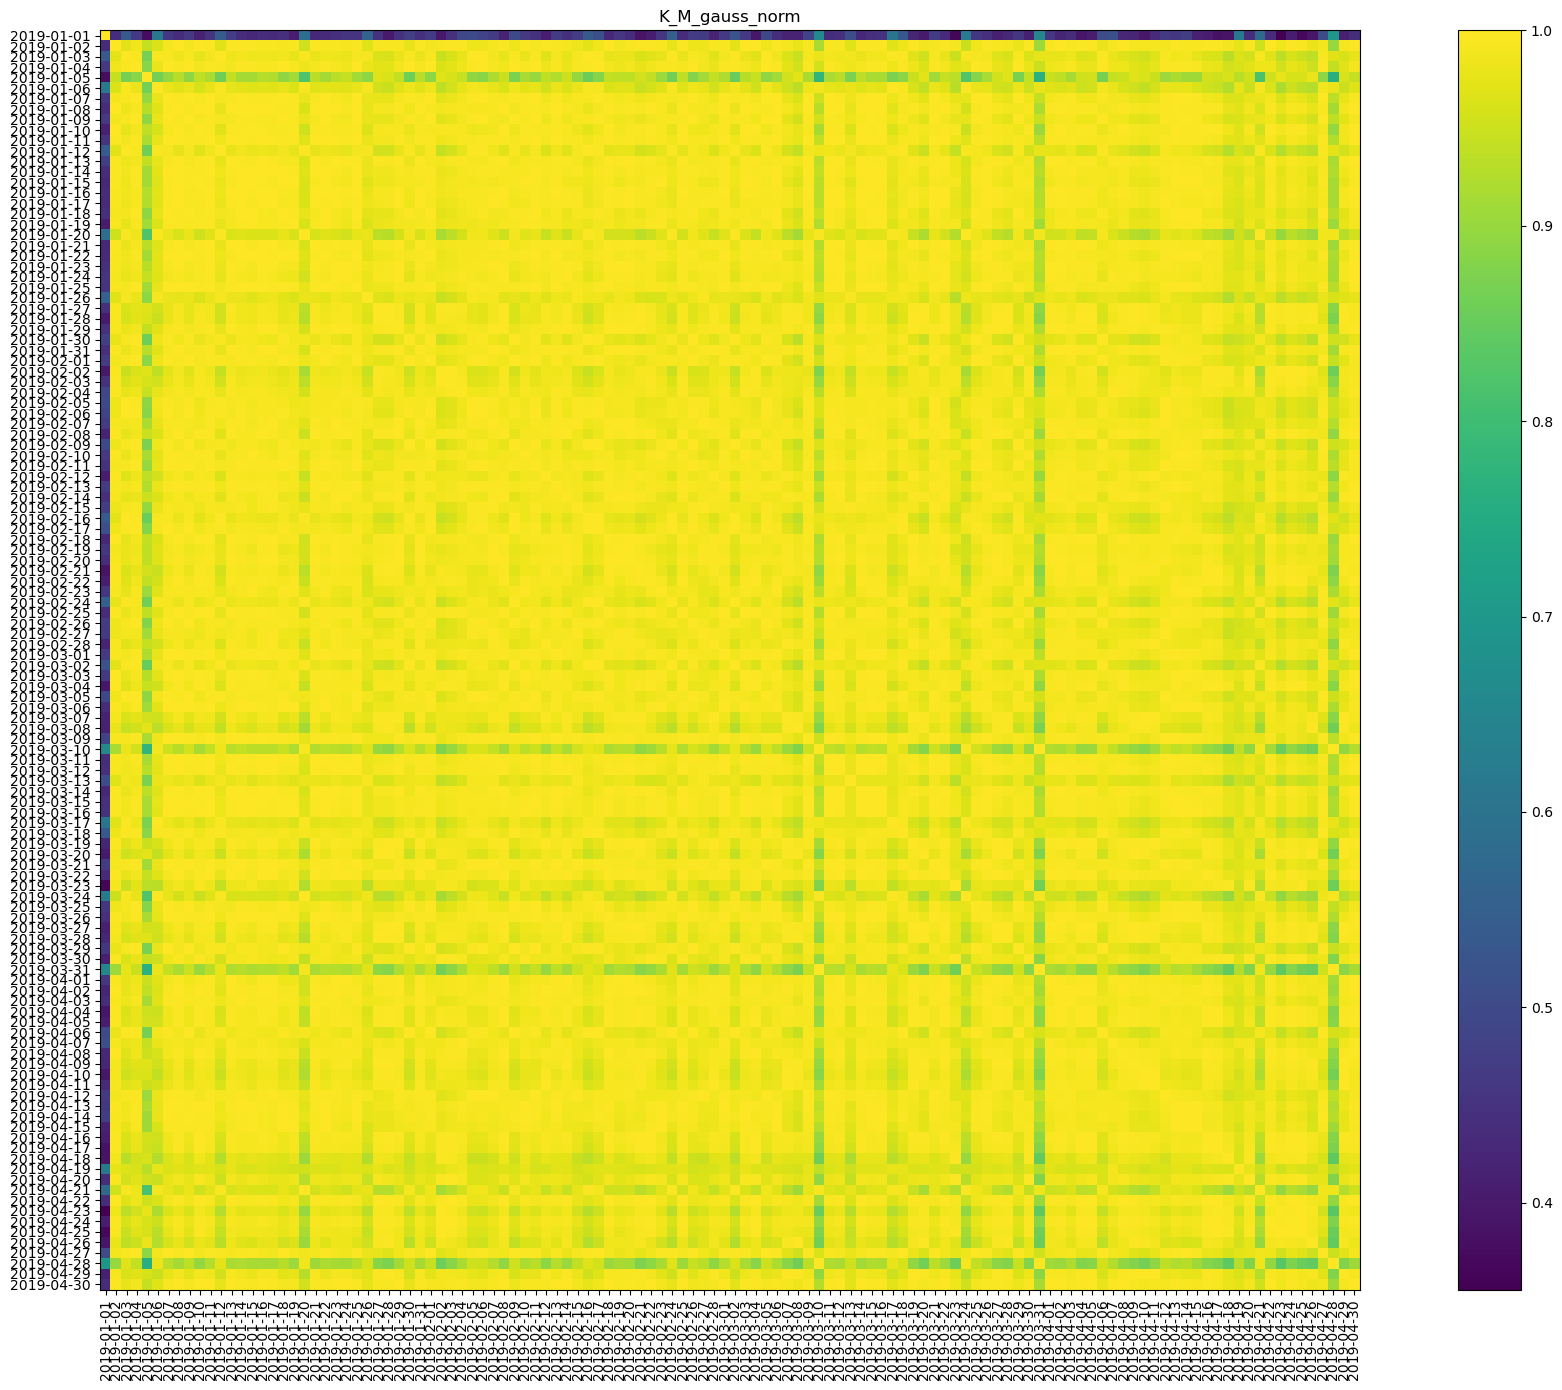

In [18]:
plot_heatmap(normalize_matrix(K_m_dirac), 'K_M_gauss_norm', dates)